In [0]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from PIL import Image
from scipy import ndimage
import copy
from PIL import Image as PILImage
import numpy as np

In [0]:
car_file = 'car.jpg'
city_file = 'citymap.png'
city_map_file = "MASK1.png"

In [0]:
class car(object):

  #x and y are center points of the car
  def __init__(self, x, y, angle):
    self.x = x
    self.y = y
    self.length, self.width = int(20), int(10)
    self.angle = angle
  
  def move(self, velocity_x, velocity_y, rotation):
    self.x = self.x + velocity_x
    self.y = self.y + velocity_y
    self.angle = self.angle + rotation

    if self.angle > 360:
      car_angle = car_angle % 360
    elif car_angle < -360:
      car_angle = car_angle % (-360)				
        

In [0]:
class city(object):

  def __init__(self, city_file):
    self.city_file = city_file
    self.city_img = cv.imread(self.city_file)
    self.width, self.length, _ = self.city_img.shape
  
  def get_current_loc_mask(self, x, y, size):
    
    if x - size/2 <0 or y - size/2 < 0 or x + size/2 > self.length - 1 or y + size/2 > self.width - 1:
      return np.ones((size,size,3))
    else:
      y = self.width - y

    img_crop = self.city_img[y - int(size/2): y + int(size/2), x - int(size/2): x + int(size/2)]
    return img_crop



In [0]:
class env(object):

  def __init__(self, car, city, city_map, car_img):
    
    self.car = car
    self.city = city
    self.city_map = city_map
    self.car_img = car_img
    self.car_img = cv.resize(self.car_img,(self.car.length, self.car.width))

  #car_x and car_y are center points of the car
  def show_image(self):   
    newcity = copy.deepcopy(self.city)
    
    car_rotated = ndimage.rotate(self.car_img, self.car.angle)
    car_wid, car_len, _ = car_rotated.shape

    pos_x = self.car.x - (car_len//2)
    pos_y = newcity.width - (self.car.y - (car_wid//2))
    
    if (pos_x < 0):
      pos_x = 0
    elif(pos_x >newcity.length):
      pos_x = newcity.length - car_len

    if(pos_y > newcity.width):
      pos_y = newcity.width - car_wid
    elif(pos_y < 0):
      pos_y = 0

    car_rotated = cv.addWeighted(newcity.city_img[pos_y:pos_y+car_wid, pos_x:pos_x+car_len],0.5,car_rotated,1,0)
    newcity.city_img[pos_y:pos_y+car_wid, pos_x:pos_x+car_len] = car_rotated

    return newcity

    def update(self, dt):

        global last_reward
        global last_distance
        global goal_x
        global goal_y
        global longueur
        global largeur
        global swap
        global first_update
        global done
        global current_step
        global max_steps
        global on_road_count
        global off_road_count
        global mode
        global boundary_hit_count
        global goal_hit_count
        global episode_total_reward
        global stop_on_hitting_goal
        size = 80

        longueur = self.city.length
        largeur = self.city.width

        if reset == True:
          print("first_update is set to True")
          first_update = True
        
        if mode == "Train":
          max_steps = 2500
        elif mode == "Eval": 
          max_steps = 500
        else:
          max_steps = 2000
            			
			
        if first_update:
            init()
            on_road_count = 0
            off_road_count = 0
            boundary_hit_count = 0
            goal_hit_count = 0
            episode_total_reward = 0.0
			
            self.car.angle = 0.0
            self.car.x = np.random.randint(100, longueur-100)
            self.car.y = np.random.randint(100, largeur-100)                
            
        xx = goal_x - self.car.x
        yy = goal_y - self.car.y
            
        sand_quality = np.sum(self.city_map.get_current_loc_mask(self.car.x, self.car.y, size))
        sand_quality = sand_quality/(size*size*3*255)
        
        if self.car.x - int(self.car.length/2) < 5 or self.car.y - int(self.car.width/2) < 5 or self.car.x - int(self.car.length/2) > self.citymap.length - 5 or self.car.y - int(self.car.width/2) > self.citymap.width - 5:
            boundary_hit_count = boundary_hit_count + 1
        
        distance = np.sqrt((self.car.x - goal_x)**2 + (self.car.y - goal_y)**2)
        
        if distance < last_distance:
            last_reward = last_reward + 5
        else:
            last_reward = last_reward + 2
                
        if distance < 25:
            last_reward = last_reward + 100
            
            goal_hit_count += 1
            
            if swap == 1:
                print("Hit the Goal 2: (" + str(goal_x) + ", " + str(goal_y) + ")")
                traversal_log.write("Train episode: " + str(train_episode_num) + " Eval episode: " + str(eval_episode_num) + " : Hit the Goal 2: (" + str(goal_x) + ", " + str(goal_y) + ")\n")
                goal_x = 575
                goal_y = 530
                swap = 0
            else:
                print("Hit the Goal 1: (" + str(goal_x) + ", " + str(goal_y) + ")")
                traversal_log.write("Train episode: " + str(train_episode_num) + " Eval episode: " + str(eval_episode_num) +  " : Hit the Goal 1: (" + str(goal_x) + ", " + str(goal_y) + ")\n")
                goal_x = 610
                goal_y = 45
                swap = 1
        
        last_distance = distance
        reward = last_reward
        current_step += 1
        
        if done== False:
            episode_total_reward += reward
        
        if current_step >= max_steps:
            done = True

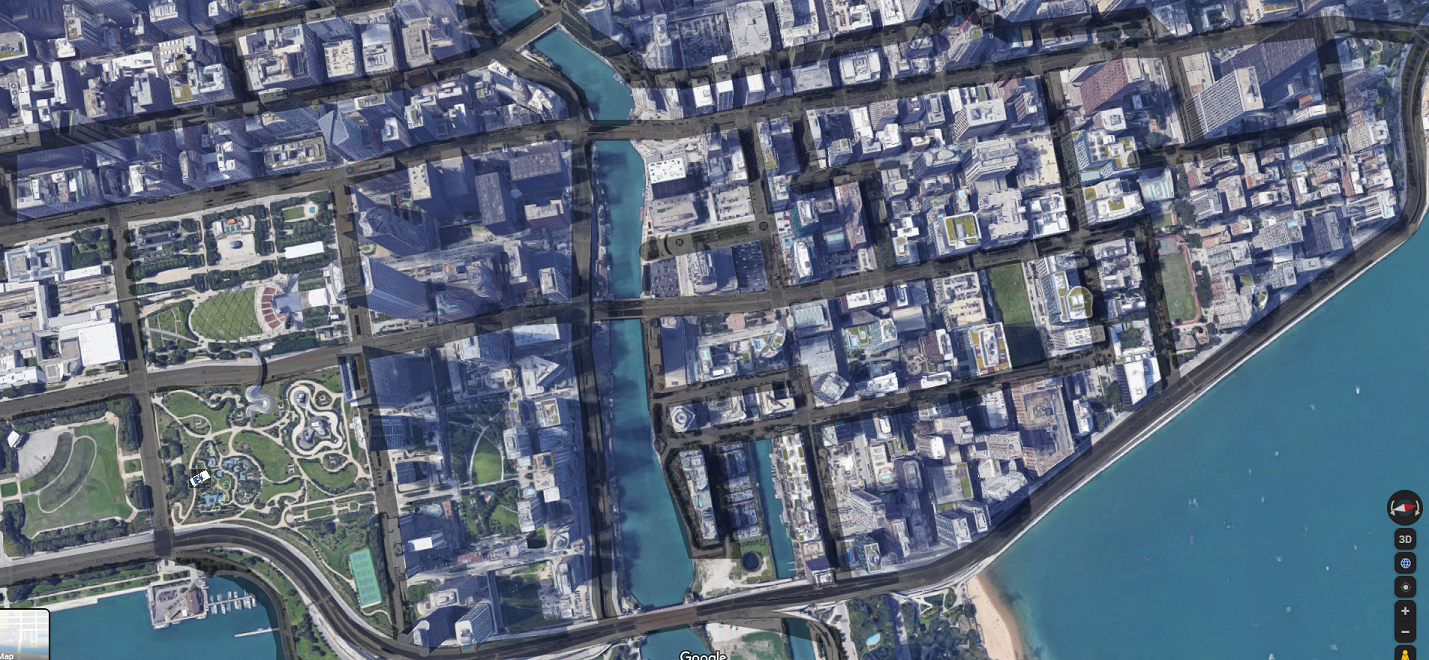

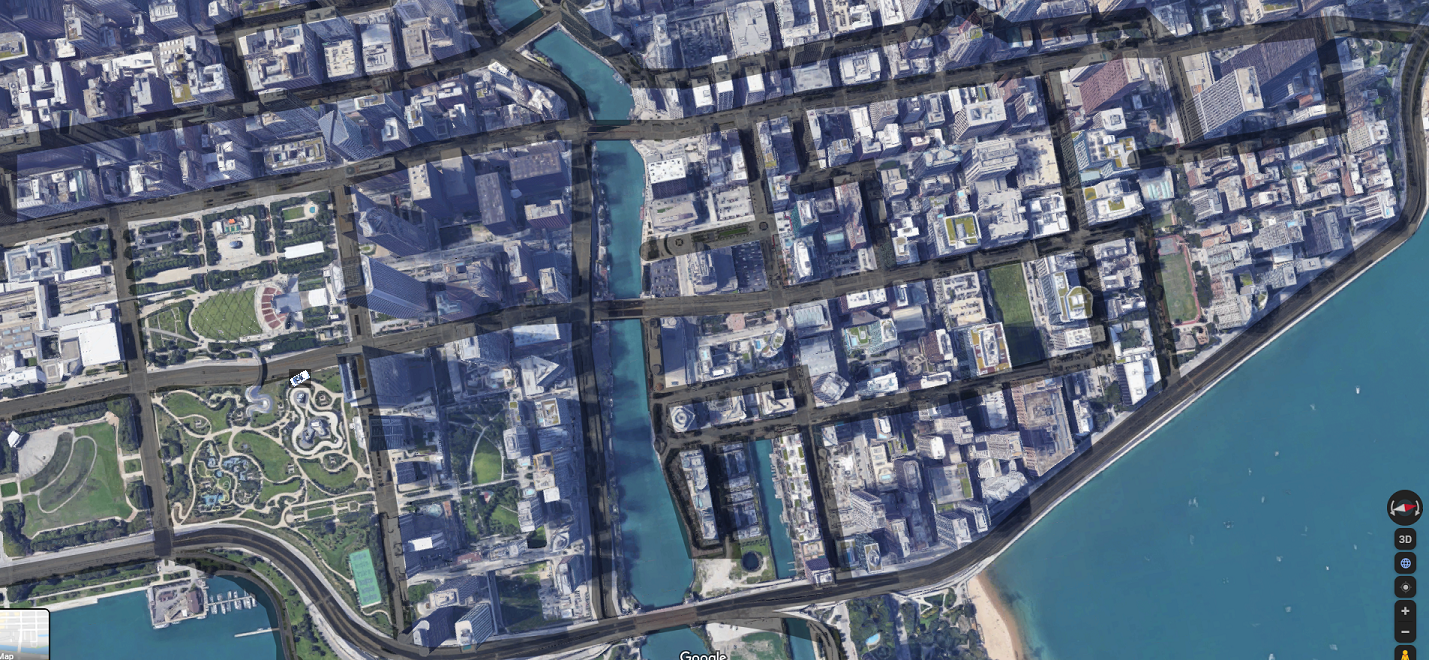

660 1429


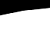

(50, 50, 3)


In [20]:
car_img = cv.imread(car_file)
car1 = car(200,200,30)
city1 = city(city_file)
citymap = city(city_map_file)
a = env(car1, city1, citymap, car_img)
newcity = a.show_image()
cv2_imshow(newcity.city_img)
car1.move(100,100,360)
newcity1 = a.show_image()
cv2_imshow(newcity1.city_img)

print(citymap.width, citymap.length)
img_crop = citymap.get_current_loc_mask(1240, 600, 50)
cv2_imshow(img_crop)
print(img_crop.shape)

In [0]:
car = cv.imread(car_file)
newcar = cv.resize(car,(int(20), int(10)))
img_rotated = ndimage.rotate(newcar, 60)
cv2_imshow(img_rotated)
cv2_imshow(newcar)

print(img_rotated.shape)

In [17]:
episode_total_reward = 0.0

print(300%200)

print(np.sum(img_crop)/(255*3*50*50))

100
0.7789741176470588
